In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
date = "08-16-24"
data_location = rf"E:\Project 6 - Temperature\Experiments\data_analysis\{date}"
full_periods = pd.read_csv(data_location + f"/{date}_full_periods.csv")
partial_periods = pd.read_csv(data_location + f"/{date}_partial_periods.csv")

# Full period - Second cycle

In [11]:
cycle_calculation = "PEAK_TO_PEAK"
cycle_number = 2

control = full_periods[
    (full_periods["POSITION"] <= 13) &
    (full_periods[f"{cycle_calculation}_CYCLE_NUMBER"] == cycle_number)
]
treatment = full_periods[
    (full_periods["POSITION"] >= 14) &
    (full_periods[f"{cycle_calculation}_CYCLE_NUMBER"] == cycle_number)
]

In [12]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control[f"{cycle_calculation}_PERIOD"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_periods = treatment[f"{cycle_calculation}_PERIOD"]

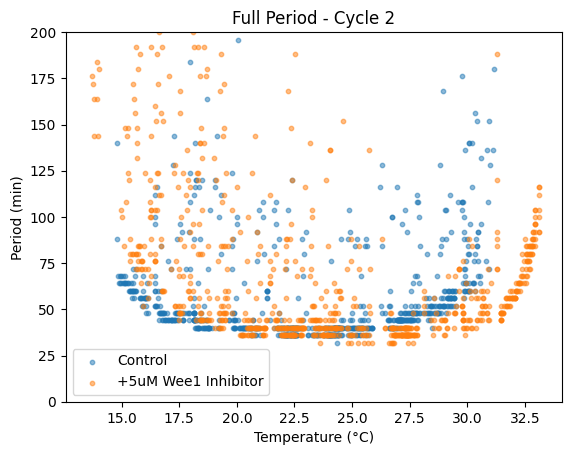

In [13]:
fig, ax = plt.subplots()
ax.title.set_text(f"Full Period - Cycle {cycle_number}")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods, label="+5uM Wee1 Inhibitor",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Period (min)")
ax.legend()
ax.set_ylim(0, 200)
plt.show()

In [28]:
# Prepare data to share
control_full_periods = control[["MEAN_TEMPERATURE", "PEAK_TO_PEAK_PERIOD"]]
control_full_periods.columns = ["Temperature", "Full_Period"]
control_full_periods.to_csv(data_location + f"/{date}_control_full_periods.csv", index=False)
treatment_full_periods = treatment[["MEAN_TEMPERATURE", "PEAK_TO_PEAK_PERIOD"]]
treatment_full_periods.columns = ["Temperature", "Full_Period"]
treatment_full_periods.to_csv(data_location + f"/{date}_treatment_full_periods.csv", index=False)

In [6]:
# Find baseline with periods between 20 and 22 temperature
control_baseline = control[
    (control["MEAN_TEMPERATURE"] >= 20) &
    (control["MEAN_TEMPERATURE"] <= 22)
]
control_baseline_period = control_baseline["PEAK_TO_PEAK_PERIOD"].mean()

treatment_baseline = treatment[
    (treatment["MEAN_TEMPERATURE"] >= 20) &
    (treatment["MEAN_TEMPERATURE"] <= 22)
]
treatment_baseline_period = treatment_baseline["PEAK_TO_PEAK_PERIOD"].mean()

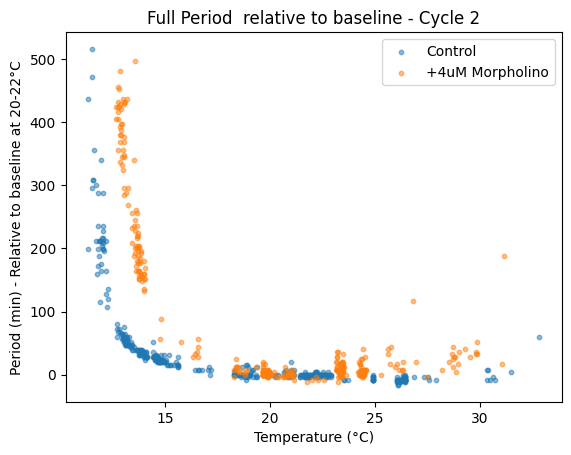

In [7]:
fig, ax = plt.subplots()
ax.title.set_text("Full Period  relative to baseline - Cycle 2")
ax.scatter(control_temperature, control_periods - control_baseline_period, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods - treatment_baseline_period, label="+4uM Morpholino",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Period (min) - Relative to baseline at 20-22°C")
ax.legend()
plt.show()

# Rising period - Second cycle

In [45]:
control = partial_periods[
    (partial_periods["POSITION"] <= 13) &
    (partial_periods["TROUGH_TO_PEAK_CYCLE_NUMBER"] == 2)
]
treatment = partial_periods[
    (partial_periods["POSITION"] >= 14) &
    (partial_periods["TROUGH_TO_PEAK_CYCLE_NUMBER"] == 2)
]

In [46]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["TROUGH_TO_PEAK_PERIOD"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_periods = treatment["TROUGH_TO_PEAK_PERIOD"]

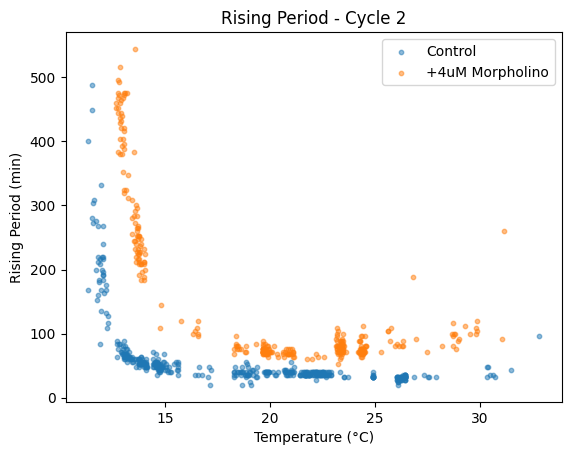

In [47]:
fig, ax = plt.subplots()
ax.title.set_text("Rising Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods, label="+4uM Morpholino",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Rising Period (min)")
ax.legend()
plt.show()

In [48]:
# Prepare data to share
control_partial_periods = control[["MEAN_TEMPERATURE", "TROUGH_TO_PEAK_PERIOD"]]
control_partial_periods.columns = ["Temperature", "Rising_Period"]
control_partial_periods.to_csv(data_location + f"/{date}_control_rising_periods.csv", index=False)
treatment_partial_periods = treatment[["MEAN_TEMPERATURE", "TROUGH_TO_PEAK_PERIOD"]]
treatment_partial_periods.columns = ["Temperature", "Rising_Period"]
treatment_partial_periods.to_csv(data_location + f"/{date}_treatment_rising_periods.csv", index=False)

# Falling period - Second cycle

In [49]:
control = partial_periods[
    (partial_periods["POSITION"] <= 13) &
    (partial_periods["PEAK_TO_TROUGH_CYCLE_NUMBER"] == 2)
]
treatment = partial_periods[
    (partial_periods["POSITION"] >= 14) &
    (partial_periods["PEAK_TO_TROUGH_CYCLE_NUMBER"] == 2)
]

In [50]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["PEAK_TO_TROUGH_PERIOD"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_periods = treatment["PEAK_TO_TROUGH_PERIOD"]

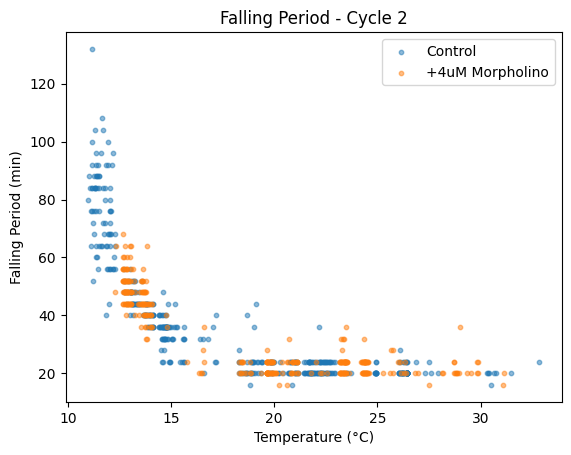

In [35]:
fig, ax = plt.subplots()
ax.title.set_text("Falling Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods, label="+4uM Morpholino",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Falling Period (min)")
ax.legend()
plt.show()

In [51]:
# Prepare data to share
control_partial_periods = control[["MEAN_TEMPERATURE", "PEAK_TO_TROUGH_PERIOD"]]
control_partial_periods.columns = ["Temperature", "Falling_Period"]
control_partial_periods.to_csv(data_location + f"/{date}_control_falling_periods.csv", index=False)
treatment_partial_periods = treatment[["MEAN_TEMPERATURE", "PEAK_TO_TROUGH_PERIOD"]]
treatment_partial_periods.columns = ["Temperature", "Falling_Period"]
treatment_partial_periods.to_csv(data_location + f"/{date}_treatment_falling_periods.csv", index=False)

# Plot peaks

In [37]:
all_data = pd.read_csv(data_location + rf"\{date}_all_features_combined_renumbered.csv")

In [38]:
control = all_data[
    (all_data["POSITION"] <= 13) &
    (all_data["CYCLE"] <= 3) &
    (all_data["TYPE"] == "PEAK")
]
treatment = all_data[
    (all_data["POSITION"] >= 14) &
    (all_data["CYCLE"] <= 3) &
    (all_data["TYPE"] == "PEAK")
]

In [43]:
control_temperature = control["MEAN_TEMPERATURE"]
control_peak_times = control["TIME"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_peak_times = treatment["TIME"]

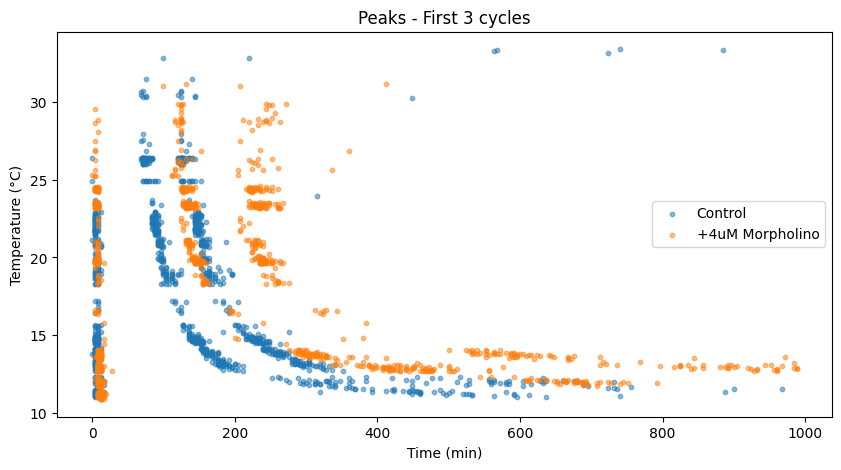

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.title.set_text("Peaks - First 3 cycles")
ax.scatter(control_peak_times, control_temperature, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_peak_times, treatment_temperature, label="+4uM Morpholino",
              color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Temperature (°C)")
ax.legend()
plt.show()

In [44]:
# Prepare data to share
control_peaks = control[["TIME", "MEAN_TEMPERATURE", "CYCLE"]]
control_peaks.columns = ["Time", "Temperature", "Cycle"]
control_peaks.to_csv(data_location + f"/{date}_control_peaks.csv", index=False)
treatment_peaks = treatment[["TIME", "MEAN_TEMPERATURE", "CYCLE"]]
treatment_peaks.columns = ["Time", "Temperature", "Cycle"]
treatment_peaks.to_csv(data_location + f"/{date}_treatment_peaks.csv", index=False)